# Exploratory data analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np

## The time window to bucket samples
TIME_RANGE = '24H'

## File path (original data is ~1GB, this is a reduced version with only categories and dates)
#Original file:
#DATAPATH = "SF311_simplified.csv"

#Sample raw data:
DATAPATH = "SF_data/SF-311_simplified.csv"

import pickle as pkl

#with open('data/MSFT_1907_noPreprocessing', 'rb') as f:
with open('data/MSFT_Jul2019_2020', 'rb') as f:
    data = pkl.load(f)
    
data.head()

,headline,text,dtickers,dtopics,time,date
0,"Nintendo Switch, Xbox One & PS4 Prime Day Deal...","Nintendo Switch, Xbox One & PS4 Prime Day Deal...","[{'Id': 'MSFT', 'score': '100'}, {'Id': '7974@...","[{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'CP...",09:36:00.297000,2019-07-14
1,"Ascent Media Introduces AERO, a New Enterprise...","Ascent Media Introduces AERO, a Ne...","[{'Id': 'MSFT', 'score': '83'}, {'Id': '137866...","[{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'MS...",08:45:27.795000,2019-07-12
2,"PC, Laptop, Printer, WiFi Router, SSD & Monito...","PC, Laptop, Printer, WiFi Router, SSD & Monito...","[{'Id': 'MSFT', 'score': '100'}, {'Id': 'DELL'...","[{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'ER...",12:33:00.343000,2019-07-14
3,"Corent, Microsoft, Financial Inclusion Leader ...","Corent, Microsoft, Financial Inclusion Leader ...","[{'Id': 'MSFT', 'score': '100'}, {'Id': 'XYF',...","[{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...",10:00:00.411000,2019-07-02
4,"I Can't Believe It's Not Butter!(R), Interpoll...",Report Groundbreaking Results at Conclusion of...,"[{'Id': 'MSFT', 'score': '100'}, {'Id': 'UNA@N...","[{'Id': 'BIZNEWS', 'score': '100'}, {'Id': 'TE...",01:11:52.613000,2019-07-04


In [3]:
for _, item in data.iterrows():
    if 'remote work' in item.text:
        print(item.date, item.text.count('remote work'))

2019-07-08 1
2019-07-18 1
2019-07-23 3
2019-08-20 1
2019-08-21 1
2019-11-05 1
2020-02-19 1
2020-02-03 1
2020-02-03 1
2020-02-03 1
2020-03-25 2
2020-03-18 4
2020-03-03 1
2020-03-20 1
2020-03-19 1
2020-03-03 1
2020-03-13 1
2020-03-19 1
2020-04-07 1
2020-04-07 1
2020-04-14 1
2020-04-16 1
2020-04-23 1
2020-04-27 1
2020-04-02 1
2020-04-23 1
2020-04-21 1
2020-04-01 2
2020-04-22 1
2020-04-29 2
2020-04-29 2
2020-04-29 1
2020-04-29 1
2020-04-29 1
2020-04-29 1
2020-05-20 1
2020-05-19 1
2020-05-12 2
2020-05-20 1
2020-05-19 1
2020-05-12 2
2020-05-02 1
2020-05-02 1
2020-05-11 1
2020-05-05 1
2020-05-05 1
2020-05-21 3
2020-05-27 1
2020-05-26 1
2020-06-26 1
2020-06-12 6
2020-06-17 1
2020-06-09 1
2020-06-25 1
2020-06-29 1
2020-06-25 1
2020-06-27 1
2020-06-03 1
2020-06-17 1
2020-06-26 1
2020-06-26 1
2020-07-07 1
2020-07-09 3
2020-07-14 1
2020-07-16 1
2020-07-16 1
2020-07-14 1
2020-07-07 1
2020-07-15 1
2020-07-08 2
2020-07-16 1
2020-07-01 1
2020-07-01 1
2020-07-22 1
2020-07-22 1
2020-07-27 1
2020-07-21 1

In [ ]:
import spacy
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from string import punctuation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

print(list(punctuation))
nlp = spacy.load("en_core_web_md") #uncomment the code in the previous cell to download the model


stop_words = set(stopwords.words('english'))

new_words = ["said", "inc", "year", "corp", "also", "net", "may", "com", "percent", "time", "new",
            'link', 'see']
stop_words = list(stop_words.union(new_words)) + list(punctuation)

new_stop_words = []
for stop_word in stop_words:
    new_stop_words.append(stop_word[0].upper() + stop_word[1:])

stop_words += new_stop_words

ps = PorterStemmer()
lem = WordNetLemmatizer()


def pre_process(text, return_tokens=True):
    clean = []
    for sent in sent_tokenize(text, language="french"):

        sent = sent.replace('¬\n', '')
        sent = sent.replace('\n', ' ')
        sent = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",sent)
        sent = re.sub('(\\d|\\W)',' ',sent)
        sent = re.sub(' +', ' ', sent)
        
        #doc = nlp(text)
        #for ent in doc.ents:
        #   # print(ent.text, ent.start_char, ent.end_char, ent.label_)
        #    if ent.label_ in ['DATE', 'MONEY', 'WORK_OF_ART', 'CARDINAL', 'PERCENT']:
        #        text = text.replace(ent.text, ' ')
        sent = re.sub(r'http\S+', '', sent)

        sent = sent.lower()
        words = word_tokenize(sent, language="french")
        temp_words = [word for word in words if word not in stop_words]
        temp_words = [word for word in temp_words if len(word) > 2]
        temp_words = [word for word in temp_words if not word.isupper()]
        temp_words = [word for word in temp_words if '$' not in word]
        temp_words = [word for word in temp_words if '@' not in word]
        temp_words = [word for word in temp_words if 'http' not in word]
        temp_words = [word for word in temp_words if 'www' not in word]
        temp_words = [word for word in temp_words if 'link' not in word]
        temp_words = [lem.lemmatize(word) for word in temp_words if lem.lemmatize(word) not in stop_words]
        
        clean += temp_words
    
    if return_tokens: 
        return clean
    else:
        return ' '.join(clean)

def remove_noise(text):
    while '--' in text:
        text = text[text.index('--')+2:]
    if '. Visit' in text:
        text = text[:text.index('. Visit')]
    if '. visit' in text:
        text = text[:text.index('. visit')]
    while '-0-' in text:
        text = text[:text.index('-0-')]
    while ' SOURCE ' in text:
        text = text[:text.index(' SOURCE ')]
    while 'NOTE:' in text:
        text = text[:text.index('NOTE:')]
    while 'More information can be found' in text:
        text = text[:text.index('More information can be found')]
    while 'CONTACT:' in text:
        text = text[:text.index('CONTACT:')]
    while 'For more information' in text:
        text = text[:text.index('For more information')]
    while 'NOTE TO EDITORS:' in text:
        text = text[:text.index('NOTE TO EDITORS:')]
    while 'can be found at' in text:
        text = text[:text.index('can be found at')]
    while 'View source version' in text:
        text = text[:text.index('View source version')]

    
    return text

stop_words = stop_words + new_stop_words + ['editor', 'contact', 'bloomberg', 'news', 'reporter', 'msft', 'window', 
'information', 'story', 'york', 'prn', 'san', 'bus', 'based', 'first', 
'help', 'today', 'including', 'top', 'site', 'related', 'princeton', 
'reporting', 'use', 'washington', 'click', 'say', 'announced', 
'best', 'yhoo', 'people', 'well', 'make', 'cnp', 'seattle', 
'taginfo', 'highavailability', 'full', 'end', 'using', 'eng',
'est', 'ticker', 'company']

corpus = [pre_process(remove_noise(text), return_tokens=True) for text in data['text'].tolist()]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


/home/eboros/anaconda3/envs/python36/lib/python3.6/site-packages/spacy/util.py:730: UserWarning: [W095] Model 'en_core_web_md' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [172]:
corpus[0][:10]

['july',
 'xbox',
 'playstation',
 'nintendo',
 'prime',
 'day',
 'deal',
 'starting',
 'retail',
 'fuse']

In [173]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot


In [223]:
top_words = get_top_n_words([' '.join(x) for x in corpus], n=150)#% + get_top_n2_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["N-grams", "Freq"]

top_df.head(10)#

,N-grams,Freq
0,microsoft,14994
1,industry,8018
2,category,5808
3,service,5515
4,region,5320
5,responsible,4854
6,solution,4726
7,business,4711
8,cloud,4600
9,illustration,4524


In [175]:
def get_similarity_matrix(KEYWORD_LIST, kw_list):
    
    similarity_matrix = []
    common_kw_list = nlp(','.join(KEYWORD_LIST))
    new_kw_list = nlp(','.join(kw_list))

    for keyword1 in common_kw_list:
        if keyword1.text not in [',']:
            similarity_vector = []
            for keyword2 in common_kw_list:
                if keyword2.text not in [',']:
                    
                    if keyword1.text == keyword2.text:
                        similarity = 1.0
                        similarity_vector.append(similarity)
                    else:
                        found = False
                        for lookout_keyword in new_kw_list:
                            if lookout_keyword.text == keyword2.text:
                                similarity = lookout_keyword.similarity(keyword1)
                                found = True
                        if found == False:
                            similarity_vector.append(0.0)
                        else:
                            similarity_vector.append(similarity)
                            
            similarity_matrix.append(similarity_vector)
    return np.array(similarity_matrix)

In [176]:
def get_ranked_matrix(matrix_similarity, sorted_matrix):

    rank = 1
    ranked_matrix = np.zeros(shape=(matrix_similarity.shape[0], matrix_similarity.shape[0]))

    for i in range(matrix_similarity.shape[0]):
        for j in range(i, matrix_similarity.shape[0]):
            temp = sorted_matrix[i][j]
            for k in range(matrix_similarity.shape[0]):
                for p in range(k, matrix_similarity.shape[0]):
                    if (matrix_similarity[k][p] != 1.0) and (temp != 1.0):
                        if matrix_similarity[k][p] == temp:
                            ranked_matrix[k][p] = rank + 1

                            rank += 1
                            continue
    return ranked_matrix

In [177]:
KEYWORD_LIST = ['microsoft', 'video', 'cloud', 'team', 'conference', 'security', 
               'xbox', 'solution', 'stock', 'azure', 'platform', 'digital', 'online']

In [283]:
from tqdm import tqdm
rankings = []
dates = []
times = []

thresh = 200

for index, text in tqdm(enumerate(corpus), total=len(corpus)):
    try:
        text = ' '.join(text)
        top_words = get_top_n_words([text], n=thresh)
        
        top_df = pd.DataFrame(top_words)

        top_df.columns=["N-grams", "Freq"]
        kw_list = top_df['N-grams'].tolist()

        matrix_similarity = get_similarity_matrix(KEYWORD_LIST, kw_list)

        sorted_vector = np.flip(np.sort(np.concatenate(matrix_similarity, axis=0)))
        sorted_matrix = np.reshape(sorted_vector, (matrix_similarity.shape[0], matrix_similarity.shape[1]))

        ranked_matrix = get_ranked_matrix(matrix_similarity, sorted_matrix)

        pair_keyword_rankings = []
        for i in range(ranked_matrix.shape[0]):
            for j in range(i, ranked_matrix.shape[0]):
                if ranked_matrix[i][j] > 0 and ranked_matrix[i][j] < thresh:
                    pair_keyword_rankings.append(('-'.join([KEYWORD_LIST[i], KEYWORD_LIST[j]]), ranked_matrix[i][j]))
                else:
                    pair_keyword_rankings.append(('-'.join([KEYWORD_LIST[i], KEYWORD_LIST[j]]), 0))
        
                
        if len(pair_keyword_rankings) > 0:
            rankings.append(pair_keyword_rankings)
            dates.append(data['date'].tolist()[index])
            times.append(data['time'].tolist()[index])
    except:
        pass
        #print(text)
        #print('empty vocabulary; perhaps the documents only contain stop words') 


100%|██████████| 11504/11504 [06:09<00:00, 31.14it/s]


In [284]:
len(dates), len(rankings)

(11361, 11361)

In [285]:
data_dict = []
for idx, item in enumerate(zip(dates, times, rankings)):
    date, time, ranking = item
    for rank in ranking:
        date_time = str(date).replace('-', '/') + ' ' + str(time)
        line = {'category': rank[0], 'Details': 'Article ' + str(idx), 'date': date_time, 'rank': rank[1],
               'only_date': str(date)}
        data_dict.append(line)
    
raw_sample_test = pd.DataFrame.from_dict(data_dict)

raw_sample_test['only_date'] =  pd.to_datetime(raw_sample_test['only_date'], format='%Y/%m/%d')

raw_sample_test = raw_sample_test.sort_values(by="date") # sanity!

from moda.dataprep import raw_to_ts
ts = raw_to_ts(raw_sample_test, date_format="%Y/%m/%d %H:%M:%S")

ts.head()

,category,Details,rank,only_date,timestamp
date,,,,,
2019-07-01 01:48:20.055,video-digital,Article 104,3.0,2019-07-01,1561945700
2019-07-01 01:48:20.055,video-online,Article 104,0.0,2019-07-01,1561945700
2019-07-01 01:48:20.055,cloud-cloud,Article 104,0.0,2019-07-01,1561945700
2019-07-01 01:48:20.055,cloud-team,Article 104,0.0,2019-07-01,1561945700
2019-07-01 01:48:20.055,cloud-conference,Article 104,0.0,2019-07-01,1561945700


In [275]:
def normalize(vector):
    return (vector-min(vector))/(max(vector)-min(vector))

ts['rank'] = normalize(ts['rank'])

ts.head()

,category,Details,rank,only_date,timestamp
date,,,,,
2019-07-01 01:48:20.055,video-digital,Article 104,0.000493,2019-07-01,1561945700
2019-07-01 01:48:20.055,video-online,Article 104,0.291044,2019-07-01,1561945700
2019-07-01 01:48:20.055,cloud-cloud,Article 104,0.000000,2019-07-01,1561945700
2019-07-01 01:48:20.055,cloud-team,Article 104,0.291208,2019-07-01,1561945700
2019-07-01 01:48:20.055,cloud-conference,Article 104,0.291372,2019-07-01,1561945700


In [256]:
#!pip install moda

In [286]:
ts.tail(100)

,category,Details,rank,only_date,timestamp
date,,,,,
2020-07-29 16:46:43.018,cloud-solution,Article 11195,4.0,2020-07-29,1596041203
2020-07-29 16:46:43.018,cloud-xbox,Article 11195,0.0,2020-07-29,1596041203
2020-07-29 16:46:43.018,cloud-security,Article 11195,0.0,2020-07-29,1596041203
2020-07-29 16:46:43.018,cloud-conference,Article 11195,28.0,2020-07-29,1596041203
2020-07-29 16:46:43.018,cloud-team,Article 11195,38.0,2020-07-29,1596041203
...,...,...,...,...,...
2020-07-30 20:53:09.891,xbox-solution,Article 11196,0.0,2020-07-30,1596142389
2020-07-30 20:53:09.891,xbox-stock,Article 11196,0.0,2020-07-30,1596142389
2020-07-30 20:53:09.891,xbox-azure,Article 11196,0.0,2020-07-30,1596142389


In [287]:
## Some general stats

print("Dataset length: " + str(len(ts)))
print("Min date: " + str(ts.index.get_level_values('date').min()))
print("Max date: " + str(ts.index.get_level_values('date').max()))

print("Total time: {}".format(ts.index.get_level_values('date').max() - ts.index.get_level_values('date').min()))

print("Dataset contains {} categories.".format(len(ts['category'].unique())))

Dataset length: 1033851
Min date: 2019-07-01 01:48:20.055000
Max date: 2020-07-30 20:53:09.891000
Total time: 395 days 19:04:49.836000
Dataset contains 91 categories.


#### Next, we decide on the time interval and aggregate items per time and category

In [288]:
ranged_ts.columns

Index(['value'], dtype='object')

In [342]:
ranged_ts = ts.groupby(['only_date', 'category']).agg({'rank':'sum'}).rename(columns={'rank':'value'})

ranged_ts.rename_axis(['date', 'category'], inplace=True)

ranged_ts.head(20)

value
date       category                    
2019-07-01 azure-azure              0.0
           azure-digital           56.0
           azure-online             0.0
           azure-platform          19.0
           cloud-azure              0.0
           cloud-cloud              0.0
           cloud-conference        26.0
           cloud-digital           53.0
           cloud-online             0.0
           cloud-platform          22.0
           cloud-security          27.0
           cloud-solution          37.0
           cloud-stock              3.0
           cloud-team              42.0
           cloud-xbox               0.0
           conference-azure         0.0
           conference-conference    0.0
           conference-digital      64.0
           conference-online        0.0
           conference-platform     34.0

In [268]:
from moda.dataprep import ts_to_range
ranged_ts = ts_to_range(ts, time_range=TIME_RANGE)
ranged_ts.head(4)

value
date       category             
2019-07-01 azure-azure      29.0
           azure-digital    29.0
           azure-online     29.0
           azure-platform   29.0

In [134]:
#!pip install dfply

In [290]:
#I'm using dfply because I like its functional-like syntax. This can also be done with plain pandas.
#!pip install dfply
from dfply import *

## Remove categories with less than 1000 items (in more than 10 years) or that existed less than 100 days
#min_values = 1000
min_values = 10
min_days = 100



categories = ranged_ts.reset_index() >> group_by(X.category) >> \
    summarise(value = np.sum(X.value),duration_in_dataset = X.date.max()-X.date.min()) >> \
    ungroup() >> \
    mask(X.duration_in_dataset.dt.days > min_days) >> \
    mask(X.value > min_values) >> \
    arrange(X.value,ascending=False)



print("Filtered dataset contains {0} categories,\nafter filtering the small ones that existed less than {1} days or had {2} values of less.".
      format(len(categories),min_days,min_values))

categories.head()

Filtered dataset contains 78 categories,
after filtering the small ones that existed less than 100 days or had 10 values of less.


,category,value,duration_in_dataset
3,azure-platform,23308.0,395 days
22,conference-stock,22390.0,395 days
88,xbox-solution,21291.0,395 days
69,team-stock,20313.0,395 days
21,conference-solution,19538.0,395 days


### Most common categories

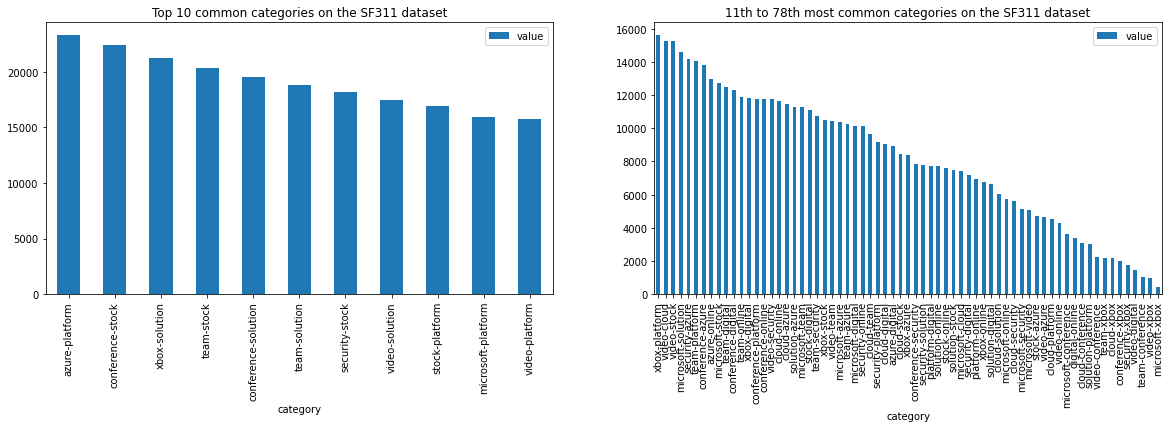

In [291]:
category_names = categories['category'].values
num_categories = len(categories)

major_category_threshold=11
major_categories = category_names[:major_category_threshold]
minor_categories = category_names[major_category_threshold:]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(20)

categories[categories['category'].isin(major_categories)].plot(kind='bar',
                                                               x='category',
                                                               y='value',
                                                               title="Top "+str(major_category_threshold-1)+" common categories on the SF311 dataset",
                                                               ax=axes[0])
categories[categories['category'].isin(minor_categories)].plot(kind='bar',
                                                               x='category',
                                                               y='value',
                                                               title=str(major_category_threshold)+"th to "+str(num_categories)+"th most common categories on the SF311 dataset",
                                                               ax=axes[1])

plt.savefig("category_values.png",bbox_inches='tight')

### Change in requests per category from year to year

/home/eboros/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/eboros/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


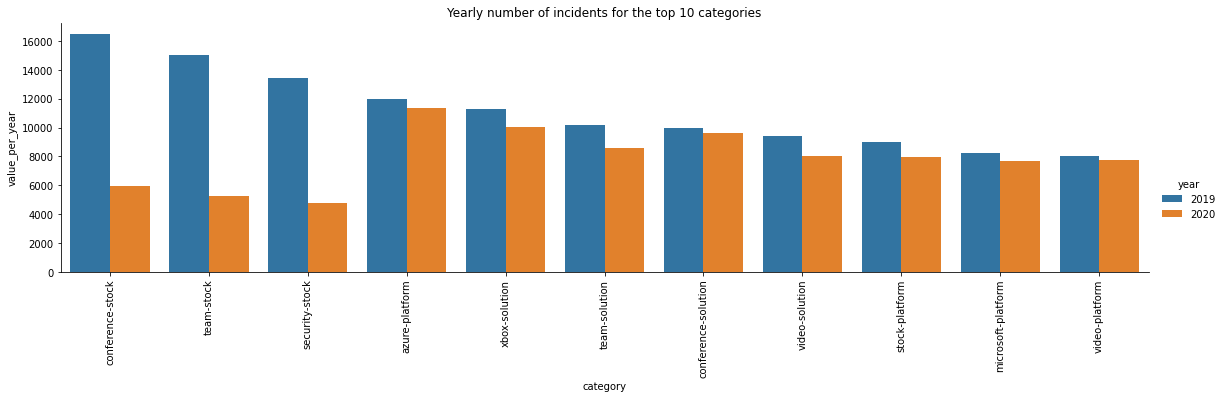

In [292]:
## Calculate the number of values per category per year
categories_yearly = ranged_ts.reset_index() >> mutate(year = X.date.dt.year) >> group_by(X.category,X.year) >> \
    summarise(value_per_year = np.sum(X.value),
              duration_in_dataset = X.date.max()-X.date.min()) >>\
    ungroup() >> \
    mask(X.value_per_year > (min_values/12.0)) >> \
    arrange(X.value_per_year,ascending=False)

import seaborn as sns

major_cats_yearly = categories_yearly[categories_yearly['category'].isin(major_categories)]

g = sns.factorplot(x='category', y='value_per_year', hue='year', data=major_cats_yearly, kind='bar', size=4, aspect=4,legend=True)
g.set_xticklabels(rotation=90)
axes = g.axes.flatten()
axes[0].set_title("Yearly number of incidents for the top "+str(major_category_threshold-1)+" categories")
plt.savefig("yearly_values.png",bbox_inches='tight')

/home/eboros/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/eboros/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Yearly number of incidents for the 11th to 78th categories')

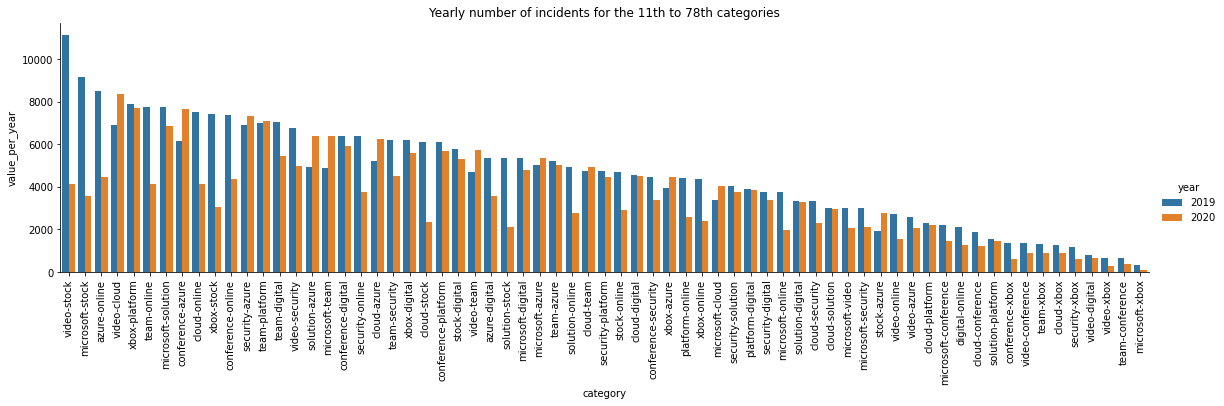

In [293]:
minor_cats_yearly = categories_yearly[categories_yearly['category'].isin(minor_categories)]

g = sns.factorplot(x='category', y='value_per_year', hue='year', data=minor_cats_yearly, kind='bar', size=4, aspect=4,legend=True)
g.set_xticklabels(rotation=90)
axes = g.axes.flatten()
axes[0].set_title("Yearly number of incidents for the "+str(major_category_threshold)+"th to "+str(num_categories)+"th categories")

### Correlation between categories over time

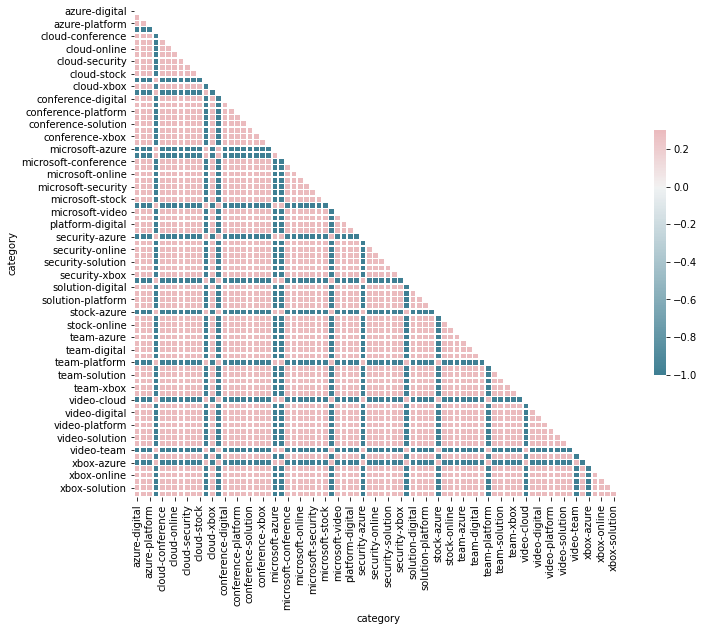

In [294]:
categories_yearly_pivot = categories_yearly.pivot("year", "category", "value_per_year")
categories_yearly_pivot.head()
corr = categories_yearly_pivot.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### One category inspection
#### Example 1: Noise Reports

<AxesSubplot:title={'center':'Number of incidents per 24 hours for microsoft-team'}, xlabel='date'>

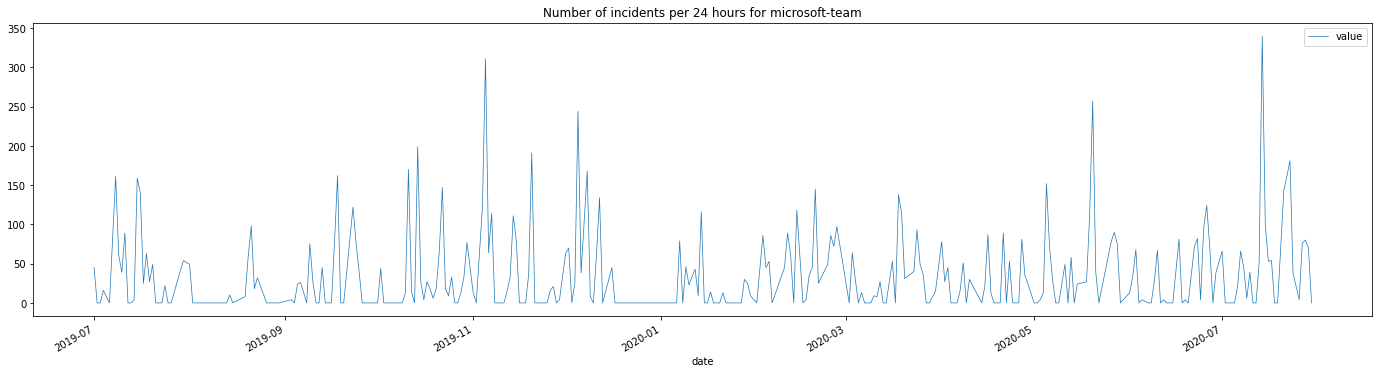

In [297]:
category = "microsoft-team"
ranged_ts.loc[pd.IndexSlice[:, category], :].reset_index().plot(kind='line',x='date',y='value',figsize=(24,6),linewidth=0.7, 
                          title = "Number of incidents per 24 hours for {}".format(category))

<AxesSubplot:title={'center':'Number of incidents per 24 hours for microsoft-azure'}, xlabel='date'>

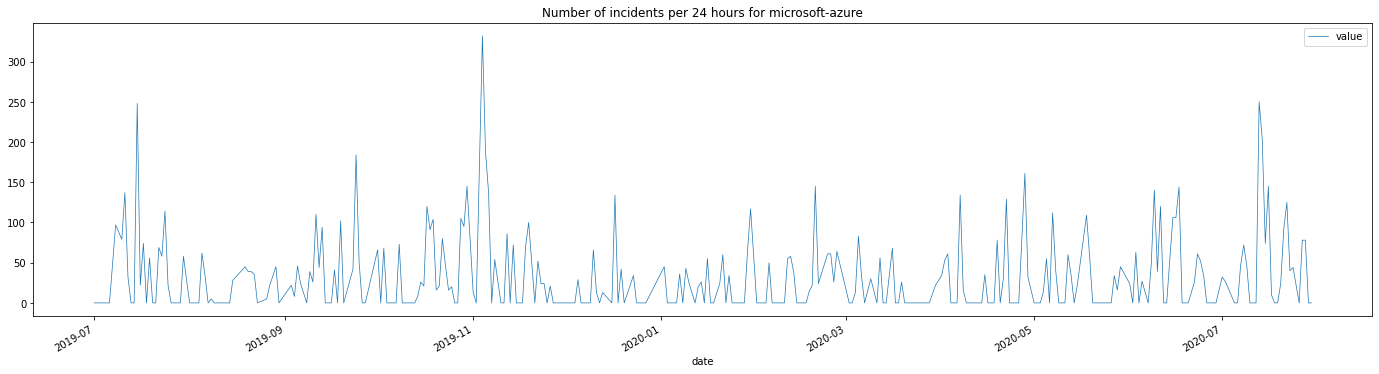

In [298]:
category = "microsoft-azure"
ranged_ts.loc[pd.IndexSlice[:, category], :].reset_index().plot(kind='line',x='date',y='value',figsize=(24,6),linewidth=0.7, 
                          title = "Number of incidents per 24 hours for {}".format(category))

As comparison, let's look at the same time series with different time ranges (30 minutes, 1 hour and 24 hours), only on two months of data

In [248]:
import moda

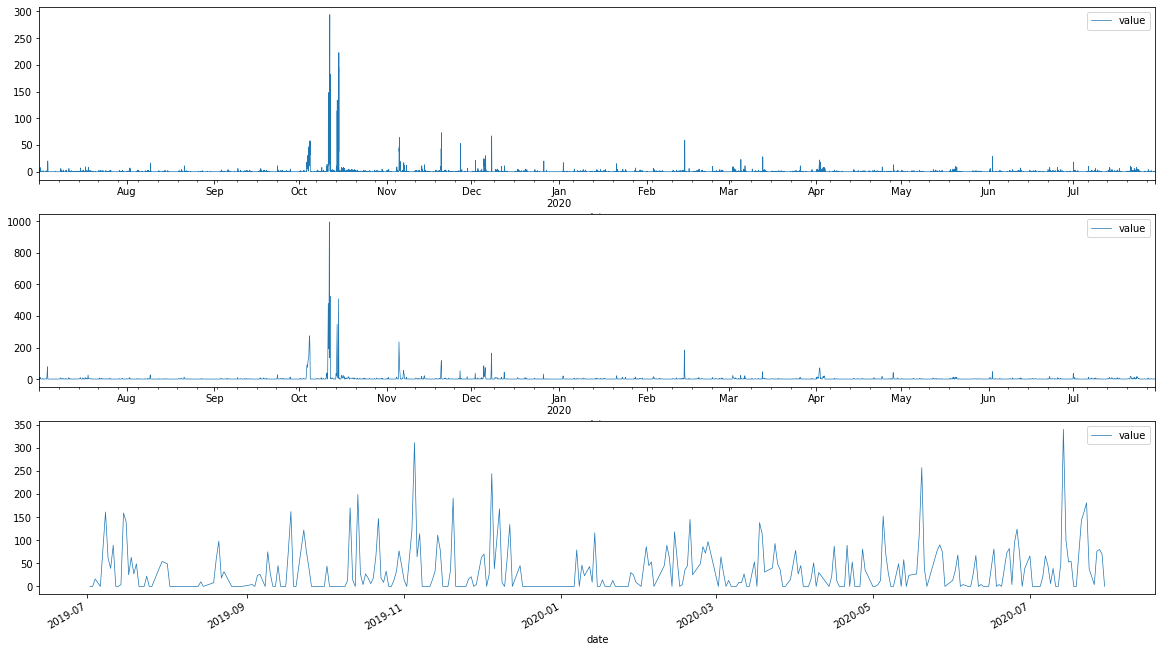

In [301]:
from moda.dataprep import ts_to_range
ranged_ts_3H = ts_to_range(ts, time_range='3H', pad_with_zeros=True)
ranged_ts_30min = ts_to_range(ts, time_range='30min', pad_with_zeros=True)
ranged_ts_24H = ts_to_range(ts, time_range='24H', pad_with_zeros=True)

START = '2019-07-01'
END = '2020-07-30'
category = 'microsoft-team'
 
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(20,12))

cleaning_30min = ranged_ts_30min.loc[pd.IndexSlice[:, category], :].reset_index()
a1 = cleaning_30min[(cleaning_30min.date > START) & (cleaning_30min.date<=END)].plot(kind='line',x='date',y='value',linewidth=0.7, ax=axes[0])

cleaning_3H = ranged_ts_3H.loc[pd.IndexSlice[:, category], :].reset_index()
a2 = cleaning_3H[(cleaning_3H.date > START) & (cleaning_3H.date<=END)].plot(kind='line',x='date',y='value',linewidth=0.7, ax=axes[1])

cleaning_24H = ranged_ts.loc[pd.IndexSlice[:, category], :].reset_index()
a3 = cleaning_24H[(cleaning_24H.date > START) & (cleaning_24H.date<=END)].plot(kind='line',x='date',y='value',linewidth=0.7, ax=axes[2])


We can see that there are multiple seasonality factors in this time series. Hourly and weekly patterns are visible on the 30 minute interval time series, and the 3 hours interval time series

In [323]:
!pip install wrapt==1.13.0rc3

     |████████████████████████████████| 77 kB 528 kB/s eta 0:00:01
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.12.1
    Uninstalling wrapt-1.12.1:
      Successfully uninstalled wrapt-1.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible.
tensorflow-gpu 2.3.1 requires tensorboard<3,>=2.3.0, but you have tensorboard 2.2.0 which is incompatible.
astroid 2.3.1 requires six==1.12, but you have six 1.15.0 which is incompatible.
astroid 2.3.1 requires wrapt==1.11.*, but you have wrapt 1.13.0rc3 which is incompatible.


In [ ]:
#from moda.evaluators import get_metrics_for_all_categories, get_final_metrics
from moda.models import STLTrendinessDetector

#dataset = read_data(f"datasets/SF24H_labeled.csv")
print(ranged_ts.head())

model = STLTrendinessDetector(freq=f'24H', 
                              min_value=10,
                              anomaly_type=f'trend',
                              num_of_std=3, lo_delta=0)

prediction = model.predict(ranged_ts)

                           value
date       category             
2019-07-01 azure-azure       0.0
           azure-digital    56.0
           azure-online      0.0
           azure-platform   19.0
           cloud-azure       0.0
STL Initialized with this params:
freq = 24H
is_multicategory = True
lo_delta = 0
lo_frac = 0.6
num_of_std = 3
seasonality = 7
min_value = 10
anomaly_type = trend
resample = True
min_periods = 10
lookback = 30D


In [336]:
prediction.head()

,,prediction,residual,residual_anomaly,residual_median,residual_std,seasonality,trend,trend_anomaly,trend_median,trend_std,value
date,category,,,,,,,,,,,
2019-07-01,azure-azure,0,0.0,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0
2019-07-02,azure-azure,0,0.0,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0
2019-07-03,azure-azure,0,0.0,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0
2019-07-04,azure-azure,0,0.0,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0
2019-07-05,azure-azure,0,0.0,0,NaN,NaN,0.0,0.0,0,NaN,NaN,0.0


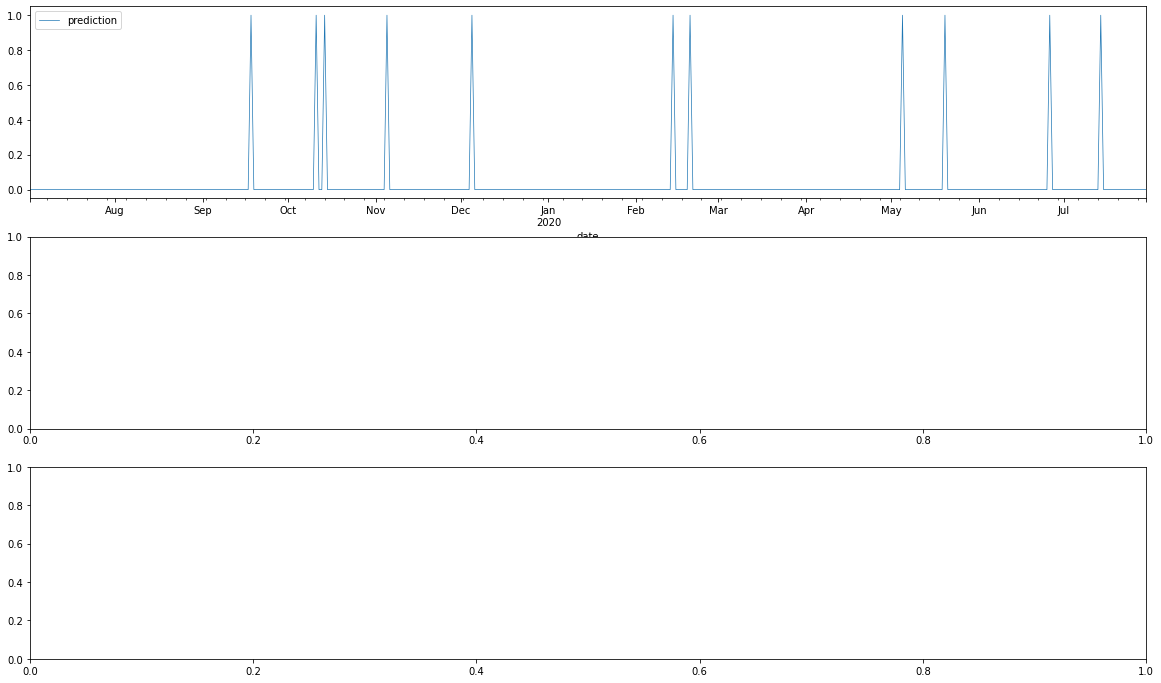

In [338]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(20,12))

cleaning_30min = prediction.loc[pd.IndexSlice[:, category], :].reset_index()
a1 = cleaning_30min[(cleaning_30min.date > START) & (cleaning_30min.date<=END)].plot(kind='line',x='date',
                                                                                     y='prediction',linewidth=0.7, ax=axes[0])


## Evaluating different models on the SF 24H data

First, in order to be able to estimate our models, we use [TagAnomaly](https://github.com/Microsoft/TagAnomaly) to tag the points we think are showing trends in the data. Taganomaly can be found here: https://github.com/Microsoft/TagAnomaly
Second, we join the tagged dataset with the time series dataset. Each sample which isn't included in the tagged dataset is assumed to be non-trending (or normal)

In [250]:
## Add labeled data
labels24H = pd.read_csv('SF_data/SF_24H_anomalies_only.csv',usecols=['date','category','value'])
labels24H.date = pd.to_datetime(labels24H.date)

labels24H['label'] = 1
labels24H.sort_values(by='date').head()

FileNotFoundError: [Errno 2] No such file or directory: 'SF_data/SF_24H_anomalies_only.csv'

In [17]:
# Since we have labels only for 2018, we'll filter out previous years.
ts2018 = ranged_ts[ranged_ts.index.get_level_values(0).year == 2018]
ts2018.head()

value
date       category                         
2018-01-01 311 External Request          0.0
           Abandoned Vehicle            52.0
           Blocked Street or SideWalk   14.0
           Catch Basin Maintenance       1.0
           Color Curb                    2.0

In [18]:
df24H = pd.merge(ts2018.reset_index(),labels24H,how='left',on=['date','category'])
df24H['label'] = np.where(np.isnan(df24H['value_y']),0,1)
df24H = df24H.set_index([pd.DatetimeIndex(df24H['date']),'category'])
df24H = df24H.drop(columns = ['date','value_y']).rename(columns = {'value_x':'value'})
df24H.head()
df24H.to_csv("SF24H_labeled.csv")

In [19]:
len(df24H)

18059

In [20]:
from moda.evaluators import get_metrics_for_all_categories, get_final_metrics
from moda.dataprep import read_data
from moda.models import TwitterAnomalyTrendinessDetector, MovingAverageSeasonalTrendinessDetector, \
    STLTrendinessDetector, AzureAnomalyTrendinessDetector


def run_model(dataset, freq, min_date='01-01-2018', plot=False, model_name='stl', min_value=10,
              min_samples_for_category=100):


    if model_name == 'twitter':
        model = TwitterAnomalyTrendinessDetector(is_multicategory=True, freq=freq, min_value=min_value, threshold=None,
                                                 max_anoms=0.49, seasonality_freq=7)

    if model_name == 'ma_seasonal':
        model = MovingAverageSeasonalTrendinessDetector(is_multicategory=True, freq=freq, min_value=min_value,
                                                        anomaly_type='or',
                                                        num_of_std=3)

    if model_name == 'stl':
        model = STLTrendinessDetector(is_multicategory=True, freq=freq, min_value=min_value,
                                      anomaly_type='residual',
                                      num_of_std=3, lo_delta=0)

    if model_name == 'azure':
        dirname = os.path.dirname(__file__)
        filename = os.path.join(dirname, 'config/config.json')
        subscription_key = get_azure_subscription_key(filename)
        model = AzureAnomalyTrendinessDetector(is_multicategory=True, freq=freq, min_value=min_value,
                                               subscription_key=subscription_key)
    
    # There is no fit/predict here. We take the entire time series and can evaluate anomalies on all of it or just the last window(s)
    prediction = model.predict(dataset, verbose=False)
    raw_metrics = get_metrics_for_all_categories(dataset[['value']], prediction[['prediction']], dataset[['label']],
                                                 window_size_for_metrics=5)
    metrics = get_final_metrics(raw_metrics)
    print(metrics)

    ## Plot each category
    if plot:
        print("Plotting...")
        model.plot(labels=dataset['label'],savefig=False)

    return prediction


ModuleNotFoundError: No module named 'moda.models.azure_anomaly_detection'

In [ ]:
prediction_stl = run_model(df24H,freq='24H',model_name='stl')

In [ ]:
def plot_one_category(category_dataset,model_name='stl'):

    def ts_subplot(plt, series, label):
        plt.plot(series, label=label, linewidth=0.5)
        plt.legend(loc='best')
        plt.xticks(rotation=90)

    plt.subplot(421, )
    ts_subplot(plt, category_dataset['value'], label='Original')
    if 'residual_anomaly' in category_dataset:
        plt.subplot(422)
        ts_subplot(plt, category_dataset['residual_anomaly'], label='Residual anomaly')
    if 'trend' in category_dataset:
        plt.subplot(423)
        ts_subplot(plt, category_dataset['trend'], label='Trend')
    if 'trend_anomaly' in category_dataset:
        plt.subplot(424)
        ts_subplot(plt, category_dataset['trend_anomaly'], label='Trend anomaly')
    if 'seasonality' in category_dataset:
        plt.subplot(425)
        ts_subplot(plt, category_dataset['seasonality'], label='Seasonality')
    
    plt.subplot(426)
    ts_subplot(plt, category_dataset['prediction'], label='Prediction')
    
    if 'residual' in category_dataset:
        plt.subplot(427)
        ts_subplot(plt, category_dataset['residual'], label='Residual')

    plt.subplot(428)
    ts_subplot(plt, category_dataset['label'], label='Labels')
    
    category = category_dataset.category[0]
    
    plt.suptitle("{} results for category {}".format(model_name, category))



In [ ]:
graffiti = prediction_stl.loc[pd.IndexSlice[:, 'Graffiti'], :].reset_index(level='category', drop=False)
fig = plt.figure(figsize=(20,8))
plot_one_category(graffiti,model_name='STL')

The time series in this case is relatively noisy. The model was more conservative than the labeler in this case.

In [ ]:
sewer = prediction_stl.loc[pd.IndexSlice[:, 'Sewer Issues'], :].reset_index(level='category', drop=False)
fig = plt.figure(figsize=(20,8))
plot_one_category(sewer,model_name='STL')

In this case, we missed the first peak as we didn't have enough historical data to estimate it. Let's compare this result to a different model:

In [ ]:
prediction_ma = run_model(df24H,freq=TIME_RANGE,model_name='ma_seasonal')

In [ ]:
sewer2 = prediction_ma.loc[pd.IndexSlice[:, 'Sewer Issues'], :].reset_index(level='category', drop=False)
fig = plt.figure(figsize=(20,8))
plot_one_category(sewer2,model_name='MA seasonal')

In [332]:
import numpy as np
import pandas as pd


def _initialize_metrics_dict():
    """
    Initialize the metrics dictionary for one category
    :return: An empty metrics dictionary
    """
    metrics = {"TP": 0, "FP": 0, "FN": 0, "num_samples": 0, "num_values": 0}
    return metrics


def _initialize_metrics(categories):
    """
    Initialize the metrics dictionary for all categories
    :param categories: A list of categories
    :return: An empty metrics dictionary
    """
    metrics = {}
    for category in categories:
        metrics[category] = _initialize_metrics_dict()

    return metrics


def calculate_metrics_with_shift(predicted, actual, window_size=3):
    """
    Calculates TP, FP, and FN while allowing shifts. For example,
    predicted = [0,1,0,0], actual [1,0,0,0] and a window_size of 1 would return a TP,
    whereas predicted [0,1,0,0] and actual [1,0,0,0] with window size 0 would return both a FP and FN
    :param predicted: an array of 0 and 1 values of predictions
    :param actual:  an array of 0 and 1 values of actual values
    :param window_size: The allowed shift to the left or the right.
    a window_size of 2 means that the corresponding value will be looked for
    in 2 cells to the left and two cells to the right
    :return: metrics, a dictionary holding the TP, FP and FN values per category.
    If a metrics value is provided as input, values will be aggregated on top of the existing metrics dictionary
    """
    metrics = _initialize_metrics_dict()
    n = len(predicted)

    # Iterate over all labels, and look for corresponding predictions in the window.
    prev = -1

    if ~np.all(actual == 0):
        for idx, act in enumerate(actual):
            found = False
            if actual[idx] == 1 and actual[idx] != prev:
                for size in range(-window_size, window_size + 1):
                    if n > (idx + size) >= 0:
                        if predicted[idx + size] == 1:
                            found = True

                if found:
                    metrics["TP"] += 1
                else:
                    metrics["FN"] += 1
            prev = act

    # Iterate over all positive predictions, and look for corresponding labels in the window
    prev = -1
    if ~np.all(predicted == 0):
        for idx, pred in enumerate(predicted):
            found = False
            if pred == 1 and pred != prev:
                for size in range(-window_size, window_size + 1):
                    if n > (idx + size) >= 0:
                        if actual[idx + size] == 1:
                            found = True

                if not found:
                    metrics["FP"] += 1
            prev = pred
    return metrics


def _get_metrics_for_one_category(
    dataset,
    label_col_name,
    prediction_col_name,
    value_col_name,
    window_size_for_metrics,
    category="",
    prev_metrics=None,
):
    """
    Returns metrics for a specific category in the data.
    :param dataset: A dataset holding the prediction, actual and value columns.
    :param label_col_name: The name of the actual values (labeled) Series
    :param prediction_col_name: The name of the predicted values Series
    :param value_col_name: Name of the value column in the dataset
    :param window_size_for_metrics:  The allowed shift to the left or the right.
    a window_size of 2 means that the corresponding value will be looked for
    in 2 cells to the left and two cells to the right
    :param category: (Optional) The name of the category if the dataset holds multiple categories
    :param prev_metrics: A dictionary of TP, FP and FN, if exists from a previous iteration
    :return: a dictionary with the precision, recall, f1, f0.5 metrics,
    as well as the number of samples per category and the sum of values.
    """
    category_results = dataset.loc[pd.IndexSlice[:, category], :]
    category_results.index = category_results.index.remove_unused_levels()
    # Calculate TP, FP and FN
    new_metrics = calculate_metrics_with_shift(
        predicted=category_results[prediction_col_name].values,
        actual=category_results[label_col_name].values,
        window_size=window_size_for_metrics,
    )
    # Calculate additional accumulators
    new_metrics["num_samples"] += len(category_results)
    new_metrics["num_values"] += np.sum(category_results[value_col_name])
    if "TP" not in new_metrics:
        new_metrics["TP"] = np.NaN
    if "FP" not in new_metrics:
        new_metrics["FP"] = np.NaN
    if "FN" not in new_metrics:
        new_metrics["FN"] = np.NaN
    new_metrics = _join_metrics(new_metrics, prev_metrics)

    return new_metrics


def _join_pred_to_dataset(original_df, prediction_df, test_values_df, label_col_name):
    results = pd.merge(prediction_df, original_df, how="left", on=["date", "category"])[
        ["prediction", label_col_name]
    ]
    results = pd.merge(results, test_values_df, how="left", on=["date", "category"])
    results[label_col_name] = results[label_col_name].fillna(0)
    results.sort_index(level=["date", "category"], ascending=True, inplace=True)
    return results


def get_metrics_for_all_categories(
    test_values_df,
    prediction_df,
    labels_df,
    value_col_name="value",
    label_col_name="label",
    prediction_col_name="prediction",
    window_size_for_metrics=5,
):
    """
    Evalutes a model with a specific set of raw_metrics,
    :param label_col_name: The name of the label column in the testing data
    :param raw_metrics: A dictionary of metric names and current values (i.e. {'TP': 0, 'FP': 0, 'TN': 0, 'FN': 0, 'num_samples': 0, 'num_values': 0})
    :param model: A model to be run, which has a fit and predict methods.
    :param prediction_col_name:
    :param test_labels: The test set's labels Series
    :param test_samples: The test set
    :param train_labels: The training set's labels Series
    :param train_samples: The training set
    :param value_col_name: The name of the Series with the actual time series values
    :param verbose:
    """

    categories = prediction_df.index.levels[1]
    all_metrics = {}

    # join the model results and test set, assuming that some dates or times are missing
    dataset = _join_pred_to_dataset(
        labels_df, prediction_df, test_values_df, label_col_name
    )
    # print(results)
    for category in dataset.index.levels[1]:
        cat_metrics = _get_metrics_for_one_category(
            dataset,
            label_col_name,
            prediction_col_name,
            value_col_name,
            window_size_for_metrics,
            category,
        )
        all_metrics[category] = cat_metrics

    return all_metrics


def _join_metrics(metrics1, metrics2):
    if metrics1 is None:
        return metrics2
    if metrics2 is None:
        return metrics1

    for category in metrics1:
        if category in metrics2:
            metrics1[category] = _join_raw_metrics(
                metrics1[category], metrics2[category]
            )

    for category in metrics2:
        if category not in metrics1:
            metrics1[category] = {}
            for metric in metrics2[category]:
                metrics1[category][metric] = metrics2[category][metric]

    return metrics1


def _join_raw_metrics(raw1, raw2):
    raw = {}
    raw["TP"] = raw1["TP"] + raw2["TP"]
    raw["FP"] = raw1["FP"] + raw2["FP"]
    raw["FN"] = raw1["FN"] + raw2["FN"]
    raw["num_samples"] = raw1["num_samples"] + raw2["num_samples"]
    raw["num_values"] = raw1["num_values"] + raw2["num_values"]

    return raw


def get_final_metrics(raw_metrics, summarized=False):
    """
    Calculates final metrics from all categories.
    :param summarized: True if the result should contain only final metrics (precision recall, f1 and f0.5)
    False if the result should contain all the per category metrics too.
    :param raw_metrics: A dictionary of tp, fp and fn values for each category
    :return: a dictionary with the precision, recall, f1 and f0.5 metrics, as well as the input metrics data.
    """

    tp = 0
    fp = 0
    fn = 0
    num_values = 0
    num_samples = 0
    final_metrics = dict()

    for category in raw_metrics:
        category_tp = raw_metrics[category]["TP"]
        category_fp = raw_metrics[category]["FP"]
        category_fn = raw_metrics[category]["FN"]

        final_metrics[category] = {}

        if category_tp > 0:
            final_metrics[category]["precision"] = category_tp / (
                category_tp + category_fp
            )
            final_metrics[category]["recall"] = category_tp / (
                category_tp + category_fn
            )
            final_metrics[category]["f1"] = f_beta(
                final_metrics[category]["precision"],
                final_metrics[category]["recall"],
                1,
            )
        if "num_values" in raw_metrics[category]:
            final_metrics[category]["num_values"] = raw_metrics[category]["num_values"]
        if "num_samples" in raw_metrics[category]:
            final_metrics[category]["num_samples"] = raw_metrics[category][
                "num_samples"
            ]

        tp += category_tp
        fp += category_fp
        fn += category_fn
        num_values += final_metrics[category]["num_values"]
        num_samples += final_metrics[category]["num_samples"]

    if (tp + fp) > 0:
        final_metrics["precision"] = tp / (tp + fp)
    else:
        final_metrics["precision"] = np.nan
    if (tp + fn) > 0:
        final_metrics["recall"] = tp / (tp + fn)
    else:
        final_metrics["recall"] = np.nan
    final_metrics["f1"] = f_beta(final_metrics["precision"], final_metrics["recall"], 1)
    final_metrics["f0.5"] = f_beta(
        final_metrics["precision"], final_metrics["recall"], 0.5
    )
    final_metrics["num_values"] = num_values
    final_metrics["num_samples"] = num_samples

    if summarized:
        return summarize_metrics(final_metrics)
    else:
        return final_metrics


def summarize_metrics(all_metrics):
    """
    Returns a subset of the metrics dictionary with only f1,f0.5,recall and precision values
    :param all_metrics:
    :return:
    """
    metric_names = [
        "f1",
        "recall",
        "precision",
        "f0.5",
        "num_samples",
        "num_metrics",
    ]  # The keys to keep
    return dict((k, all_metrics[k]) for k in metric_names if k in all_metrics)


def f_beta(precision, recall, beta):
    """
    Returns the F score for precision, recall and a beta parameter
    :param precision: a double with the precision value
    :param recall: a double with the recall value
    :param beta: a double with the beta parameter of the F measure, which gives more or less weight to precision vs. recall
    :return: a double value of the f(beta) measure.
    """
    if np.isnan(precision) or np.isnan(recall) or (precision == 0 and recall == 0):
        return np.nan
    return ((1 + beta ** 2) * precision * recall) / (((beta ** 2) * precision) + recall)

This model estimates the trend differently, and found some anomalies on the trend series as well. It too couldn't detect the first peak as it requires some historical data to estimate standard deviation and other statistics.